<a href="https://colab.research.google.com/github/harmanpreet93/reinforcement-learning-COMP-767/blob/master/Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frozen Lake: Stochastic Environment

In [0]:
import numpy as np
import gym

import matplotlib.pyplot as plt
% matplotlib inline

Helper functions to plot graphs

In [0]:
def evaluate_policy(env, policy, episodes=5):
    cumulative_reward = 0
    cumulative_timesteps = 0
    max_reward = 0
    min_timesteps = 200
    count = 0

    # iterate over multiple episodes - and log rewards and timestamps
    for _ in range(episodes):
        curr_state = env.reset()
        done = False
        curr_reward = 0
        curr_timesteps = 0
        
        while not done:
            # sample action as per policy            
            action = np.random.choice(env.action_space.n, size=1, p=policy[curr_state])[0]
            curr_state, reward, done, info = env.step(action)
            curr_timesteps += 1
            curr_reward += reward
        
        min_timesteps = min(min_timesteps, curr_timesteps)
        max_reward = max(max_reward, curr_reward)
        cumulative_timesteps += curr_timesteps
        cumulative_reward += curr_reward

    # get average timestamps and rewards
    avg_timesteps = cumulative_timesteps / episodes
    avg_reward = cumulative_reward / episodes
    return avg_reward, avg_timesteps, max_reward, min_timesteps


def plot(data, labels, title, dashed = False):
  for i, r in enumerate(data):
      if dashed:
        plt.plot(r, "--", label='seed {}'.format(i))
      else:
        plt.plot(r, label='seed {}'.format(i))
  plt.title(title)
  plt.legend()
  plt.xlabel('Iterations')
  plt.ylabel(labels)

In [0]:
# random_policy = np.ones((env.nS, env.nA))/env.nA
# policy1, avg_reward_F, avg_timesteps_F, max_reward_F, min_timesteps = policy_iteration(random_policy, env, gamma=1, eta = 1e-8)
# policy2 = value_iteration(env, gamma=0.2, eta=1e-8)

Value Iteration  11
Policy Updated


FROZEN LAKE


In [0]:
env = gym.make("FrozenLake-v0")

POLICY *ITERATION*

In [0]:
def policy_improvement(policy, Q, env, type):
  for state in range(env.nS):
    mask = np.argwhere(Q[state] == max(Q[state])).flatten()
    policy[state] = np.zeros(env.nA)
    policy[state][mask] = 1./len(mask)
  if type=="update":
    print("Policy Updated")
  if type=="graph":
    pass 
  return policy


def policy_evaluation(policy, V, Q, env, gamma, eta):
  i = 0
  while(True):
    i+=1
    old_V = V.copy()
    Q = np.zeros((env.nS, env.nA))
    for state in range(env.nS):
      value = 0
      for action in range(env.nA):
        # iterating because the same action can take us to multiple states..[stochastic env]
        for prob_nextstate_action, next_state, reward, done in env.P[state][action]:
          Q[state][action] += prob_nextstate_action*(reward + gamma*old_V[next_state])
        value += policy[state][action]*Q[state][action]
      V[state] = value    

    # Stop if all the value functions changes are smaller than threshold i.e. eta
    if np.all(abs(V - old_V) < eta):
      print("Policy Evaluation Iteration ",i)
      break
  return V,Q
  
def policy_iteration(policy, env, gamma, eta):
  new_policy = policy.copy()
  train_avg_reward_F, train_avg_timesteps_F, train_max_reward_F, train_min_timesteps_F = [], [], [], [] 
  test_avg_reward_F, test_avg_timesteps_F, test_max_reward_F, test_min_timesteps_F = [], [], [], [] 

  for i in range(4):
    V, Q = policy_evaluation(policy=new_policy, V=np.zeros(env.nS), Q=np.zeros((env.nS, env.nA)), env=env, gamma=gamma, eta=eta)
    new_policy = policy_improvement(new_policy, Q, env, type="update")

    ## Store rewards at training time
    policy_placeholder = np.ones((env.nS, env.nA))/env.nA
    policy_for_testing = policy_improvement(policy_placeholder, Q, env, type="graph")
    avg_reward, avg_timesteps, max_reward, min_timesteps = evaluate_policy(env, policy_for_testing, episodes = 5)
    train_avg_reward_F.append(avg_reward); 
    train_avg_timesteps_F.append(avg_timesteps); 
    train_max_reward_F.append(max_reward); 
    train_min_timesteps_F.append(min_timesteps)

    if i%2==0:
      ## Store rewards at testing time
      policy_placeholder = np.ones((env.nS, env.nA))/env.nA
      policy_for_testing = policy_improvement(policy_placeholder, Q, env, type="graph")
      avg_reward, avg_timesteps, max_reward, min_timesteps = evaluate_policy(env, policy_for_testing, episodes = 5)
      test_avg_reward_F.append(avg_reward); 
      test_avg_timesteps_F.append(avg_timesteps); 
      test_max_reward_F.append(max_reward); 
      test_min_timesteps_F.append(min_timesteps)

  return new_policy, train_avg_reward_F, train_avg_timesteps_F, train_max_reward_F, train_min_timesteps_F, test_avg_reward_F, test_avg_timesteps_F, test_max_reward_F, test_min_timesteps_F

In [0]:
## Running policy iteration with 5 different seeds

train_avg_reward_FF, train_avg_timesteps_FF, train_max_reward_FF, train_min_timesteps_FF = [], [], [], []
test_avg_reward_FF, test_avg_timesteps_FF, test_max_reward_FF, test_min_timesteps_FF = [], [], [], []

random_policy = np.ones((env.nS, env.nA))/env.nA
for seed in [105, 64, 23, 133, 100]:
  np.random.seed(seed)
  env.seed(seed)
  env.reset()
  print("Seed -> ", seed)
  policy1, train_avg_reward_F, train_avg_timesteps_F, train_max_reward_F, train_min_timesteps_F, test_avg_reward_F, test_avg_timesteps_F, test_max_reward_F, test_min_timesteps_F = policy_iteration(random_policy, env, gamma=0.5, eta = 1e-8)
  train_avg_reward_FF.append(train_avg_reward_F); 
  train_avg_timesteps_FF.append(train_avg_timesteps_F) 
  train_max_reward_FF.append(train_max_reward_F); 
  train_min_timesteps_FF.append(train_min_timesteps_F)
  test_avg_reward_FF.append(test_avg_reward_F); 
  test_avg_timesteps_FF.append(test_avg_timesteps_F) 
  test_max_reward_FF.append(test_max_reward_F); 
  test_min_timesteps_FF.append(test_min_timesteps_F)


Seed ->  105
Policy Evaluation Iteration  17
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Seed ->  64
Policy Evaluation Iteration  17
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Seed ->  23
Policy Evaluation Iteration  17
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Seed ->  133
Policy Evaluation Iteration  17
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Seed ->  100
Policy Evaluation Iteration  17
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updated
Policy Evaluation Iteration  22
Policy Updat

Training Reward Plots

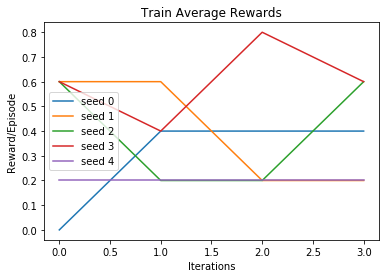

In [0]:
plot(train_avg_reward_FF, "Reward/Episode", "Train Average Rewards", dashed = False)

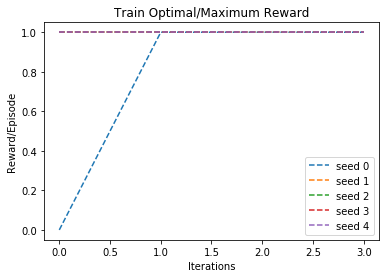

In [0]:
plot(train_max_reward_FF, "Reward/Episode", "Train Optimal/Maximum Reward", dashed = True)

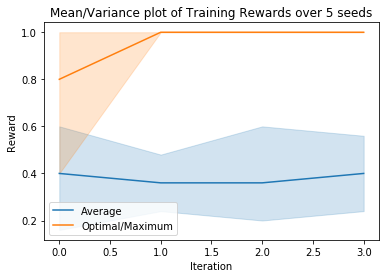

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_avg_reward_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_max_reward_FF)))
plt.legend(['Average', 'Optimal/Maximum'])
plt.xlabel("Iteration");
plt.ylabel("Reward");
plt.title("Mean/Variance plot of Training Rewards over 5 seeds");

Testing Reward Plots

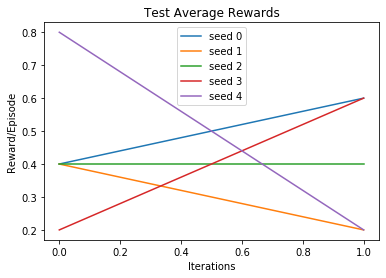

In [0]:
plot(test_avg_reward_FF, "Reward/Episode", "Test Average Rewards", dashed = False)

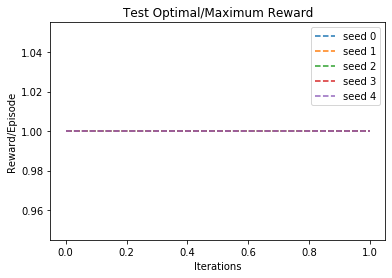

In [0]:
plot(test_max_reward_FF, "Reward/Episode", "Test Optimal/Maximum Reward", dashed = True)

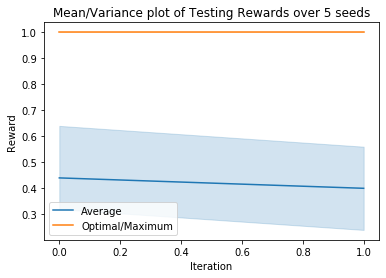

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_avg_reward_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_max_reward_FF)))
plt.legend(['Average', 'Optimal/Maximum'])
plt.xlabel("Iteration");
plt.ylabel("Reward");
plt.title("Mean/Variance plot of Testing Rewards over 5 seeds");

Train Timestep Plots

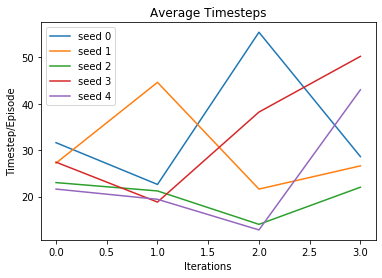

In [0]:
plot(train_avg_timesteps_FF, "Timestep/Episode", "Train Average Timesteps", dashed = False)

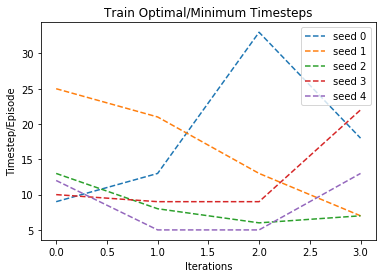

In [0]:
plot(train_min_timesteps_FF, "Timestep/Episode", "Train Optimal/Minimum Timesteps", dashed = True)

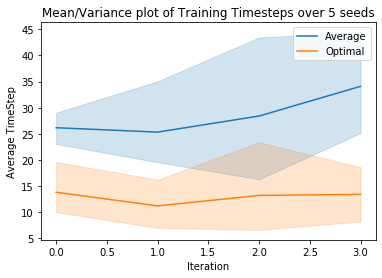

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_avg_timesteps_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_min_timesteps_FF)))
plt.legend(['Average', 'Optimal'])
plt.xlabel("Iteration");
plt.ylabel("Average TimeStep");
plt.title("Mean/Variance plot of Training Timesteps over 5 seeds");

Testing Timestep Plots

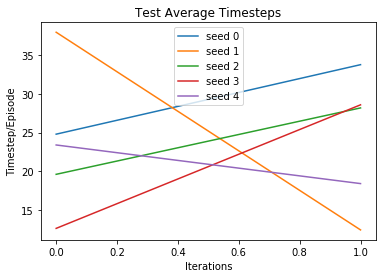

In [0]:
plot(test_avg_timesteps_FF, "Timestep/Episode", "Test Average Timesteps", dashed = False)

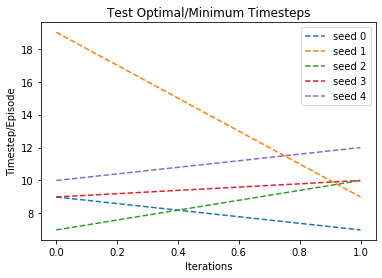

In [0]:
plot(test_min_timesteps_FF, "Timestep/Episode", "Test Optimal/Minimum Timesteps", dashed = True)

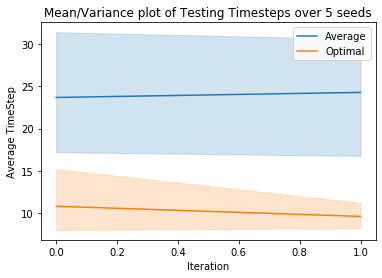

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_avg_timesteps_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_min_timesteps_FF)))
plt.legend(['Average', 'Optimal'])
plt.xlabel("Iteration");
plt.ylabel("Average TimeStep");
plt.title("Mean/Variance plot of Testing Timesteps over 5 seeds");

**VALUE ITERATION**

In [0]:
# Value iteration 
def value_iteration(env, gamma, eta):
  V=np.zeros(env.nS)
  i = 0
  train_avg_reward_F, train_avg_timesteps_F, train_max_reward_F, train_min_timesteps_F = [], [], [], []
  test_avg_reward_F, test_avg_timesteps_F, test_max_reward_F, test_min_timesteps_F = [], [], [], []

  while(True):
    i+=1
    old_V = V.copy()
    Q = np.zeros((env.nS, env.nA))
    for state in range(env.nS):
      for action in range(env.nA):
        for prob_nextstate_action, next_state, reward, done in env.P[state][action]:
          Q[state][action] += prob_nextstate_action*(reward + gamma*old_V[next_state])
      V[state] = max(Q[state])

    ## Below lines for storing rewards at training time..
    policy_placeholder = np.ones((env.nS, env.nA))/env.nA
    policy = policy_improvement(policy_placeholder, Q, env, type="graph")
    avg_reward, avg_timesteps, max_reward, min_timesteps = evaluate_policy(env, policy, episodes = 5)
    train_avg_reward_F.append(avg_reward); 
    train_avg_timesteps_F.append(avg_timesteps); 
    train_max_reward_F.append(max_reward); 
    train_min_timesteps_F.append(min_timesteps)

    if i%5==0:
      ## Below lines for storing rewards at training time..
      policy_placeholder = np.ones((env.nS, env.nA))/env.nA
      policy = policy_improvement(policy_placeholder, Q, env, type="graph")
      avg_reward, avg_timesteps, max_reward, min_timesteps = evaluate_policy(env, policy, episodes = 5)
      test_avg_reward_F.append(avg_reward); 
      test_avg_timesteps_F.append(avg_timesteps); 
      test_max_reward_F.append(max_reward); 
      test_min_timesteps_F.append(min_timesteps)
    
    if np.all(abs(V - old_V) < eta):
        print("Value Iteration ", i)
        break
  
  policy_placeholder = np.ones((env.nS, env.nA))/env.nA
  policy = policy_improvement(policy_placeholder, Q, env, type="update")

  return policy, train_avg_reward_F, train_avg_timesteps_F, train_max_reward_F, train_min_timesteps_F, test_avg_reward_F, test_avg_timesteps_F, test_max_reward_F, test_min_timesteps_F

In [0]:
train_avg_reward_FF, train_avg_timesteps_FF, train_max_reward_FF, train_min_timesteps_FF = [], [], [], []
test_avg_reward_FF, test_avg_timesteps_FF, test_max_reward_FF, test_min_timesteps_FF = [], [], [], []

for seed in [100, 200, 300, 400, 500]:
  np.random.seed(seed)
  env.seed(seed)
  env.reset()
  print("Seed -> ", seed)
  policy1, train_avg_reward_F, train_avg_timesteps_F, train_max_reward_F, train_min_timesteps_F, test_avg_reward_F, test_avg_timesteps_F, test_max_reward_F, test_min_timesteps_F = value_iteration(env, gamma=0.2, eta = 1e-8)
  train_avg_reward_FF.append(train_avg_reward_F); 
  train_avg_timesteps_FF.append(train_avg_timesteps_F) 
  train_max_reward_FF.append(train_max_reward_F); 
  train_min_timesteps_FF.append(train_min_timesteps_F)

  test_avg_reward_FF.append(test_avg_reward_F); 
  test_avg_timesteps_FF.append(test_avg_timesteps_F) 
  test_max_reward_FF.append(test_max_reward_F); 
  test_min_timesteps_FF.append(test_min_timesteps_F)
  

Seed ->  100
Value Iteration  11
Policy Updated
Seed ->  200
Value Iteration  11
Policy Updated
Seed ->  300
Value Iteration  11
Policy Updated
Seed ->  400
Value Iteration  11
Policy Updated
Seed ->  500
Value Iteration  11
Policy Updated


Training Reward Plots

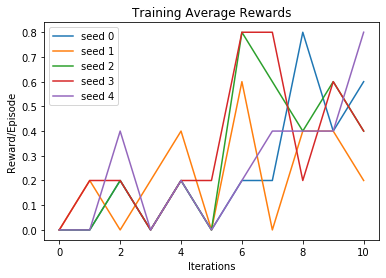

In [0]:
plot(train_avg_reward_FF, "Reward/Episode", "Training Average Rewards", dashed = False)

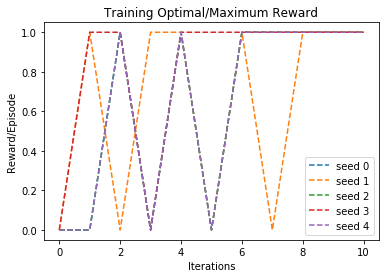

In [0]:
plot(train_max_reward_FF, "Reward/Episode", "Training Optimal/Maximum Reward", dashed = True)

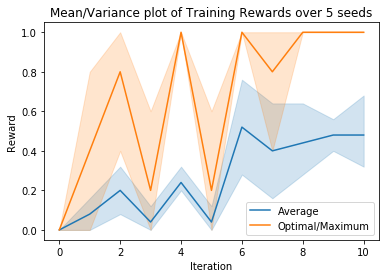

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_avg_reward_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_max_reward_FF)))
plt.legend(['Average', 'Optimal/Maximum'])
plt.xlabel("Iteration");
plt.ylabel("Reward");
plt.title("Mean/Variance plot of Training Rewards over 5 seeds");

Testing Reward Plots

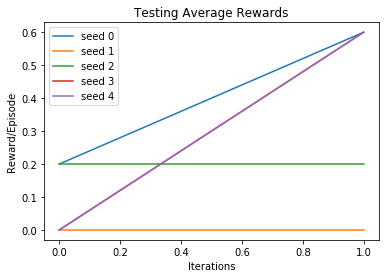

In [0]:
plot(test_avg_reward_FF, "Reward/Episode", "Testing Average Rewards", dashed = False)

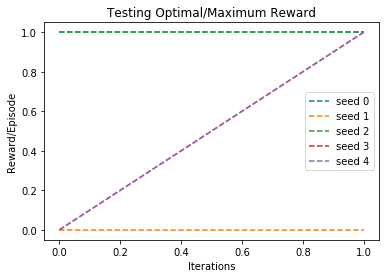

In [0]:
plot(test_max_reward_FF, "Reward/Episode", "Testing Optimal/Maximum Reward", dashed = True)

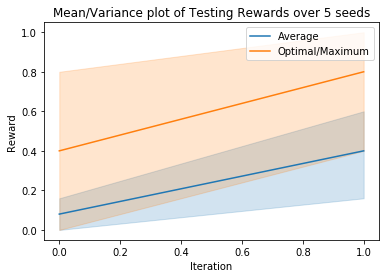

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_avg_reward_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_max_reward_FF)))
plt.legend(['Average', 'Optimal/Maximum'])
plt.xlabel("Iteration");
plt.ylabel("Reward");
plt.title("Mean/Variance plot of Testing Rewards over 5 seeds");

## Training Timestep Plots

The reason we have less timestep in the beginning is because the policy is not good and the episode ends as it enters the hole leading to less timesteps for the episode to end. 


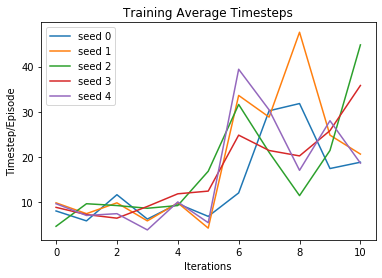

In [0]:
plot(train_avg_timesteps_FF, "Timestep/Episode", "Training Average Timesteps", dashed = False)

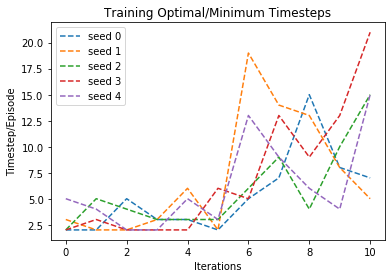

In [0]:
plot(train_min_timesteps_FF, "Timestep/Episode", "Training Optimal/Minimum Timesteps", dashed = True)

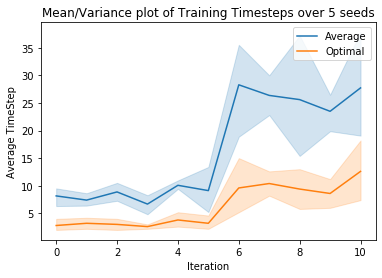

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_avg_timesteps_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(train_min_timesteps_FF)))
plt.legend(['Average', 'Optimal'])
plt.xlabel("Iteration");
plt.ylabel("Average TimeStep");
plt.title("Mean/Variance plot of Training Timesteps over 5 seeds");

Testing Timestep Plots

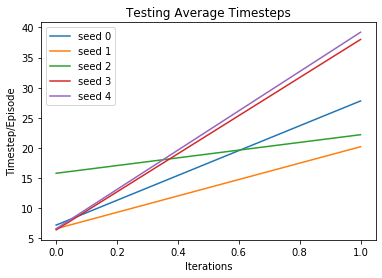

In [0]:
plot(test_avg_timesteps_FF, "Timestep/Episode", "Testing Average Timesteps", dashed = False)

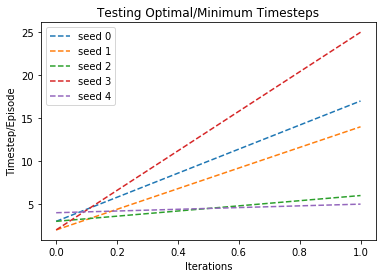

In [0]:
plot(test_min_timesteps_FF, "Timestep/Episode", "Testing Optimal/Minimum Timesteps", dashed = True)

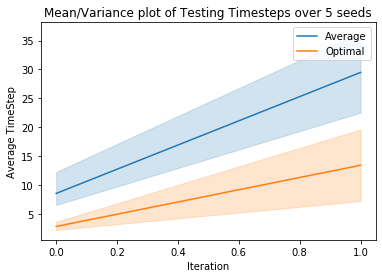

In [0]:
import pandas as pd
import seaborn as sns
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_avg_timesteps_FF)))
sns.lineplot(x="variable", y="value", data=pd.melt(pd.DataFrame(test_min_timesteps_FF)))
plt.legend(['Average', 'Optimal'])
plt.xlabel("Iteration");
plt.ylabel("Average TimeStep");
plt.title("Mean/Variance plot of Testing Timesteps over 5 seeds");

Running the agent in the environment based on policy

In [0]:
final_policy = np.argmax(policy1, axis = 1)
state = 0
env.reset()
env.render()
while True:
  action = int(final_policy[state])
  (state,reward,is_done,_) = env.step(action)
  env.render()
  if is_done:
    break


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Ri